<a href="https://colab.research.google.com/github/achalgarg14/training_mnist_rand/blob/main/Achal_Training_MNIST_Rand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Importing Libraries

In [2]:
import numpy as np
import torch
from torch.autograd import grad 
import torch.nn.functional as F
import torch.optim as optim
import torchvision # provide access to datasets, models, transforms, utils, etc
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

#Downloading MNIST Data

In [13]:
train_set = torchvision.datasets.MNIST(
    root='./data'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)
test_set = torchvision.datasets.MNIST(
    root='./data'
    ,train=False
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



# Understanding MNIST Data

In [14]:
print(train_set)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )


In [15]:
print(test_set)

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )


In [ ]:
i = 0
print("Train Labels")
for j in train_set:
  print(j[1])
  i+=1
  if i > 5:
    break
    
print("Test Labels")
i=0
for j in test_set:
  print(j[1])
  i+=1
  if i > 5:
    break

Train Labels
5
0
4
1
9
2
Test Labels
7
2
1
0
4
1



Trying out Batch Creation

In [16]:
train_loader = torch.utils.data.DataLoader(
    train_set, 
    batch_size=5,
    shuffle=True
)

In [ ]:
len(train_set), len(test_set)

(60000, 10000)

In [ ]:
train_set.targets, test_set.targets

(tensor([5, 0, 4,  ..., 5, 6, 8]), tensor([7, 2, 1,  ..., 4, 5, 6]))

In [ ]:
print(train_set.targets.bincount())
print(test_set.targets.bincount())

tensor([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949])
tensor([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009])


In [21]:
sample = next(iter(train_set))

In [ ]:
type(sample)

tuple

In [ ]:
sample[0].shape

torch.Size([1, 28, 28])

In [ ]:
sample[0]

In [ ]:
sample[1]

5

label: 5


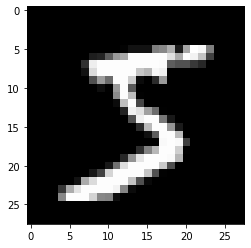

In [22]:
image, label = sample

plt.imshow(image.squeeze(), cmap='gray')
print('label:', label)

In [ ]:
batch = next(iter(train_loader))
len(batch), type(batch)

(2, list)

In [ ]:
batch[1][0]

tensor(1)

label: tensor(1)


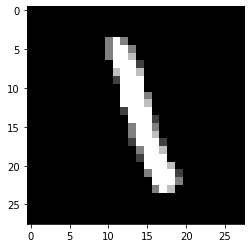

In [ ]:
image = batch[0][0]
label = batch[1][0]

plt.imshow(image.squeeze(), cmap='gray')
print('label:', label)

In [ ]:
len(batch[0])

5

In [ ]:
images, labels = batch

In [ ]:
images.shape, labels.shape

(torch.Size([5, 1, 28, 28]), torch.Size([5]))

labels: tensor([7, 6, 7, 8, 3, 1, 9, 3, 2, 5, 1, 4, 8, 3, 3, 9, 8, 4, 0, 1, 7, 9, 7, 8,
        9, 7, 6, 3, 3, 5, 9, 7])


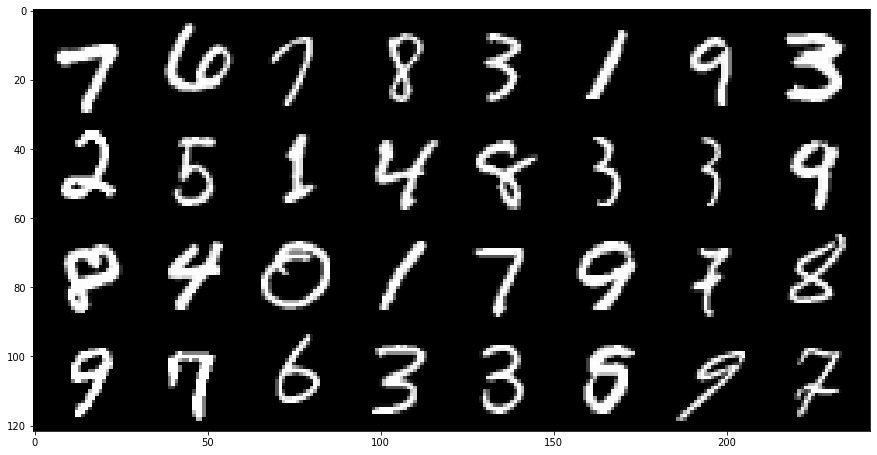

In [ ]:
train_loader = torch.utils.data.DataLoader(
    train_set, 
    batch_size=32,
    shuffle=True
)
batch = next(iter(train_loader))
images, labels = batch
grid = torchvision.utils.make_grid(images, nrow=8)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))
print('labels:', labels)

labels: tensor([1, 9, 3, 5, 8, 3, 7, 5, 6, 2, 5, 1, 9, 4, 5, 9, 8, 7, 2, 5, 3, 2, 9, 1,
        7, 5, 7, 4, 3, 5, 0, 9])


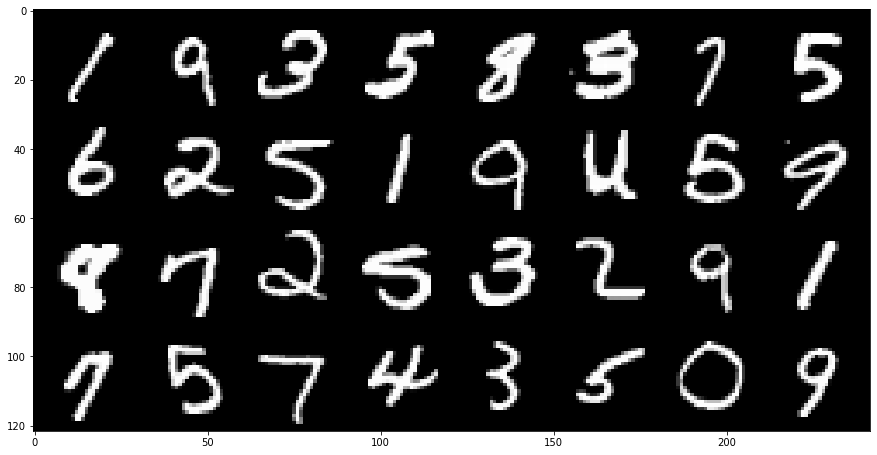

In [ ]:
batch = next(iter(train_loader))
images, labels = batch
grid = torchvision.utils.make_grid(images, nrow=8)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))
print('labels:', labels)

#Setting device to cude 


In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


# Creating Dataset with 2 inputs and 2 labels

# Creating MNIST Dataset

In [9]:
train_mnist_set = torchvision.datasets.MNIST(
    root='./data'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)
test_mnist_set = torchvision.datasets.MNIST(
    root='./data'
    ,train=False
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

In [10]:
len(train_mnist_set), len(test_mnist_set)

(60000, 10000)

In [25]:
type(train_mnist_set[0])

tuple

In [ ]:
train_mnist_set[0][0]

In [27]:
train_mnist_set[0][1]

5

# Creating Random Number Dataset

This will contain one hot encoding as input and the number as label

*Not Able to implement this approach without a for loop*

Test Code

In [ ]:
random_num = torch.randint(low = 0, high = 10, size=(1,10))

In [ ]:
random_num.shape

torch.Size([1, 10])

In [ ]:
random_num

tensor([[9, 5, 3, 3, 0, 4, 1, 8, 4, 7]])

In [ ]:
output = F.one_hot(random_num, num_classes = 10)

In [ ]:
output.shape

torch.Size([1, 10, 10])

In [ ]:
labels_rand = torch.argmax(output, dim=-1)

In [ ]:
labels_rand

tensor([[9, 5, 3, 3, 0, 4, 1, 8, 4, 7]])

Final Random Data

*Not used Finally*

In [ ]:
train_random_labels = torch.randint(low = 0, high = 10, size=(1,60000))
test_random_labels = torch.randint(low = 0, high = 10, size=(1,10000))

In [ ]:
train_random_data = F.one_hot(train_random_labels, num_classes = 10)
test_random_data = F.one_hot(test_random_labels, num_classes = 10)

In [ ]:
train_random_data.shape

torch.Size([1, 60000, 10])

# Dataset Class

In [12]:
import torch.nn as nn
from torch.utils.data import Dataset

In [14]:
class mnist_rand(Dataset):
  def __init__(self,image_data):
    self.image_data = image_data

  def __getitem__(self, index):
    rand_no = torch.randint(0, 10, (1,))            #number from 0 to 9
    rand_no_one_hot = F.one_hot(rand_no, num_classes=10)    #one hot encoding
    return { "image": self.image_data[index][0], 
              "label_image": self.image_data[index][1],
              "number": rand_no_one_hot,
              "label_num": rand_no }      
           #returning encoded data & label

  def __len__(self):
    return len(self.image_data)

In [15]:
train_data = mnist_rand(train_mnist_set)
len(train_data)

60000

In [16]:
test_data = mnist_rand(test_mnist_set)
len(test_data)

10000

# Checking the Class Dataset loader (mnist_rand)

In [17]:
train_loader_check = torch.utils.data.DataLoader(
    train_data, 
    batch_size = 2, 
    shuffle=True
)

In [18]:
for t in train_loader_check:
  print(t)

  break

{'image': tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]]), 'label_image': tensor([0, 0]), 'number': tensor([[[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]],

        [[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]), 'label_num': tensor([[9],
        [0]])}


#Defining Network

In [30]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3)       
    self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)      
    self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3)     
    self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3)   
    self.conv5 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3)    
    self.conv6 = nn.Conv2d(in_channels=512, out_channels=64, kernel_size=1)
    self.conv7 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3)   
    self.conv8 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3)
    self.conv9 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3)    
    self.fc1 = nn.Linear(in_features=512 * 3 * 3, out_features=60)
    self.out = nn.Linear(in_features=60, out_features=10)
    self.fc2 = nn.Linear(in_features=20, out_features=60)
    self.out2 = nn.Linear(in_features=60, out_features=19)
    
  def forward(self, t1, t2):          #input has 2 dataset
    # input layer
    x1 = t1
    # conv block 1
    x1 = self.conv1(x1) # 28 -> 26 RF 3 In_Ch: 1  Out_Ch: 32
    x1 = F.relu(x1)
    x1 = self.conv2(x1) # 26 -> 24 RF 5 In_Ch: 32 Out_Ch: 64
    x1 = F.relu(x1)
    x1 = self.conv3(x1) # 24 -> 22 RF 7  In_Ch: 64 Out_Ch: 128
    x1 = F.relu(x1)
    x1 = self.conv4(x1) # 22 -> 20 RF 9  In_Ch: 128 Out_Ch: 256
    x1 = F.relu(x1)
    x1 = self.conv5(x1) # 20 -> 18 RF 11  In_Ch: 256 Out_Ch: 512
    x1 = F.relu(x1)
    #Transition Block
    x1 = F.max_pool2d(x1, kernel_size=2, stride=2) # 18 -> 9 Out_Ch: 512
    x1 = self.conv6(x1) # 9 -> 9 RF 22 In_Ch: 512 Out_Ch: 64
    x1 = F.relu(x1)
    # conv block 2
    x1 = self.conv7(x1) # 9 > 7 RF 24   In_Ch: 64 Out_Ch: 128
    x1 = F.relu(x1)
    x1 = self.conv8(x1) # 7 > 5 RF 26   In_Ch: 128 Out_Ch: 256
    x1 = F.relu(x1)
    x1 = self.conv9(x1) # 5 > 3 RF 28   In_Ch: 256 Out_Ch: 512
    x1 = F.relu(x1)
    # reshape
    x1 = x1.reshape(-1, 512*3*3)            #512 Channel & 3x3 output
    # fc1 layer
    x1 = self.fc1(x1)                 #FC Layer Output: 60
    x1 = F.relu(x1)
    # output layer for MNIST
    x1 = self.out(x1)                 #FC Layer Output: 10 (same as MNIST Classes)
    
    #predict class to be used as Input for SUM; one hot encoding for predicted number
    pred_mnist = F.one_hot(torch.argmax(x1,dim=1), num_classes=10)
    #concatenate first output & second input
    x2 = torch.cat((pred_mnist,t2), dim=1)  #concatenate second input t2 & predicted class of t1
    x2 = x2.to(torch.float32)               #change dtype to allow data to pass to FC2
    x2 = self.fc2(x2)                       #Passing to FC layer input 20 & Output: 60
    x2 = F.relu(x2)
    # output layer for SUM
    x2 = self.out2(x2)                      #Out layer for second input 60 & output: 19 (sum 0 to 18)
    return x1, x2                           #return both output

#Network 1 Checking

In [20]:
network = Network()
network.to(device)

Network(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (conv5): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
  (conv6): Conv2d(512, 64, kernel_size=(1, 1), stride=(1, 1))
  (conv7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (conv9): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=4608, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
  (fc2): Linear(in_features=20, out_features=60, bias=True)
  (out2): Linear(in_features=60, out_features=19, bias=True)
)

#Get Correct predictions

In [21]:
def get_correct(preds, labels):
  return preds.argmax(dim=1).eq(labels).sum().item()

#Defining train & test loader batch size 64

In [22]:
#batch size as 64
train_loader_rand = torch.utils.data.DataLoader(
    train_data, 
    batch_size=64,
    shuffle=True
)
test_loader_rand = torch.utils.data.DataLoader(
    test_data, 
    batch_size = 64, 
    shuffle=True
)

#Checking Network

In [26]:
optimizer = optim.Adam(network.parameters(), lr=0.001)

total_loss_mnist = 0
total_correct_mnist = 0
total_loss_sum = 0
total_correct_sum = 0
i=0
for batch in train_loader_rand: 
    images = batch['image'].to(device)                    #push data to GPU if available
    labels_mnist = batch['label_image'].to(device) 
    num = batch['number'].to(device)
    # print('Num Shape',num.squeeze(1))
    labels_num = batch['label_num'].reshape(1,-1)
    labels_num= labels_num.to(device)
    preds_mnist, preds_sum = network(images,num.squeeze(1))      # Pass data to Network
    labels_sum = labels_mnist + labels_num              #creating labels for Sum
    labels_sum = labels_sum.to(device)
    loss_mnist = F.cross_entropy(preds_mnist, labels_mnist) # Calculate Loss for MNIST
    loss_sum = F.cross_entropy(preds_sum, labels_sum.reshape(-1)) # Calculate Loss for Sum 

    loss = loss_mnist + loss_sum    #Total loss
    optimizer.zero_grad()             
    loss.backward()
    optimizer.step() # Update Weights

    #calculating loss and correct prediction
    total_loss_mnist += loss_mnist.item()
    total_correct_mnist += get_correct(preds_mnist, labels_mnist)
    total_loss_sum += loss_sum.item()
    total_correct_sum += get_correct(preds_sum, labels_sum)

    print(
        "step:", i, 
        "tot_corr MNIST %:", total_correct_mnist / len(images) *100, 
        "loss MNIST:", total_loss_mnist,
        "tot_corr Sum %:", total_correct_sum / len(images) *100, 
        "loss Sum:", total_loss_sum    
    )
    i+=1
    break

here 0  torch.Size([64, 1, 28, 28])
here 1  torch.Size([64, 32, 26, 26])
here 2  torch.Size([64, 64, 24, 24])
here 3  torch.Size([64, 128, 22, 22])
here 4  torch.Size([64, 512, 18, 18])
here 5  torch.Size([64, 512, 9, 9])
here 6  torch.Size([64, 64, 9, 9])
here 7  torch.Size([64, 128, 7, 7])
here 8  torch.Size([64, 256, 5, 5])
here 9  torch.Size([64, 512, 3, 3])
here 10 torch.Size([64, 4608])
here 11  torch.Size([64, 60])
here 12  torch.Size([64, 10])
Pred MNIST  torch.Size([64, 10])
Pred t2  torch.Size([64, 10])
step: 0 tot_corr MNIST %: 3.125 loss MNIST: 2.318002223968506 tot_corr Sum %: 9.375 loss Sum: 2.9318084716796875


#Final Run on Network post all checking

Initializing Network

In [31]:
network = Network()
network.to(device)

Network(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (conv5): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
  (conv6): Conv2d(512, 64, kernel_size=(1, 1), stride=(1, 1))
  (conv7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (conv9): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=4608, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
  (fc2): Linear(in_features=20, out_features=60, bias=True)
  (out2): Linear(in_features=60, out_features=19, bias=True)
)

Defining Train and Test Loader

In [32]:
#batch size as 64
train_loader_rand = torch.utils.data.DataLoader(
    train_data, 
    batch_size=64,
    shuffle=True
)
test_loader_rand = torch.utils.data.DataLoader(
    test_data, 
    batch_size = 64, 
    shuffle=True
)

Model Training Code

In [33]:
optimizer = optim.Adam(network.parameters(), lr=0.001)

for epoch in range(10):
    total_loss_mnist = 0
    total_correct_mnist = 0
    total_loss_sum = 0
    total_correct_sum = 0

    for batch in train_loader_rand: 
      images = batch['image'].to(device)                    #push data to GPU
      labels_mnist = batch['label_image'].to(device) 
      num = batch['number'].to(device)
      labels_num = batch['label_num'].reshape(1,-1)
      labels_num= labels_num.to(device)
      preds_mnist, preds_sum = network(images,num.squeeze(1))      # Pass data to Network
      labels_sum = labels_mnist + labels_num              #creating labels for Sum
      labels_sum = labels_sum.to(device)
      loss_mnist = F.cross_entropy(preds_mnist, labels_mnist) # Calculate Loss for MNIST
      loss_sum = F.cross_entropy(preds_sum, labels_sum.reshape(-1)) # Calculate Loss for Sum 

      loss = loss_mnist + loss_sum    #Total loss
      optimizer.zero_grad()             
      loss.backward()
      optimizer.step() # Update Weights

      #calculating loss and correct prediction
      total_loss_mnist += loss_mnist.item()
      total_correct_mnist += get_correct(preds_mnist, labels_mnist)
      total_loss_sum += loss_sum.item()
      total_correct_sum += get_correct(preds_sum, labels_sum)

    print(
        "epoch:", epoch+1, 
        "Train tot_corr MNIST %:", total_correct_mnist / len(train_data) *100, 
        "Train loss MNIST:", total_loss_mnist,
        "Train tot_corr Sum %:", total_correct_sum / len(train_data) *100, 
        "Train loss Sum:", total_loss_sum    
    )

epoch: 1 Train tot_corr MNIST %: 88.26166666666667 Train loss MNIST: 320.3550047716126 Train tot_corr Sum %: 63.30166666666667 Train loss Sum: 1564.0195602476597
epoch: 2 Train tot_corr MNIST %: 98.09333333333333 Train loss MNIST: 61.82956232584547 Train tot_corr Sum %: 98.09333333333333 Train loss Sum: 286.855624563992
epoch: 3 Train tot_corr MNIST %: 98.50833333333333 Train loss MNIST: 45.970023427245906 Train tot_corr Sum %: 98.50833333333333 Train loss Sum: 143.2396039813757
epoch: 4 Train tot_corr MNIST %: 98.71666666666667 Train loss MNIST: 37.453331277065445 Train tot_corr Sum %: 98.71666666666667 Train loss Sum: 112.04190501756966
epoch: 5 Train tot_corr MNIST %: 99.02166666666666 Train loss MNIST: 30.813055960032216 Train tot_corr Sum %: 99.02166666666666 Train loss Sum: 83.42545540165156
epoch: 6 Train tot_corr MNIST %: 99.23333333333333 Train loss MNIST: 24.193896213340622 Train tot_corr Sum %: 99.23333333333333 Train loss Sum: 67.12655450124294
epoch: 7 Train tot_corr MNIST

# Save Model

In [36]:
torch.save(network.state_dict(), "/content/drive/MyDrive/EVA8/MNIST_Rand/network1_10_epoch.pt")

#Inference on Test Set

Loading Model

In [37]:
model = Network()
model.load_state_dict(torch.load("/content/drive/MyDrive/EVA8/MNIST_Rand/network1_10_epoch.pt"))
model.eval()

Network(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (conv5): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
  (conv6): Conv2d(512, 64, kernel_size=(1, 1), stride=(1, 1))
  (conv7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (conv9): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=4608, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
  (fc2): Linear(in_features=20, out_features=60, bias=True)
  (out2): Linear(in_features=60, out_features=19, bias=True)
)

Using model in cuda

In [ ]:
model.cuda()

Calculating model Accuracy on Test Set

In [53]:
test_correct_mnist = 0
test_correct_sum = 0
test_acc_mnist = 0.0
test_acc_sum = 0.0
for batch in test_loader_rand:
    with torch.no_grad():
        images = batch['image'].to(device)                    #push data to GPU
        labels_mnist = batch['label_image'].to(device) 
        num = batch['number'].to(device)
        labels_num = batch['label_num'].reshape(1,-1)
        labels_num= labels_num.to(device)
        preds_mnist, preds_sum = model(images,num.squeeze(1))
        # calculate accuracy
        labels_sum = labels_mnist + labels_num              #creating labels for Sum
        labels_sum = labels_sum.to(device)
        test_correct_mnist += get_correct(preds_mnist, labels_mnist)
        test_correct_sum += get_correct(preds_sum, labels_sum)

print(
  "Test tot_corr MNIST %:", test_correct_mnist / len(test_data) *100, 
  "Test tot_corr Sum %:", test_correct_sum / len(test_data) *100, 
)

Test tot_corr MNIST %: 99.03999999999999 Test tot_corr Sum %: 99.03999999999999
